In [1]:

import pandas as pd 
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import imgaug.augmenters as iaa

In [2]:
# ================================

# 1. Load dataset

# ================================

train_data = pd.read_csv('archive/sign_mnist_train.csv')
test_data = pd.read_csv('archive/sign_mnist_test.csv')

y_train = train_data['label']
X_train = train_data.drop('label', axis=1)

y_test = test_data['label']
X_test = test_data.drop('label', axis=1)


In [3]:
# ================================

# 2. Train/Validation split

# ================================

X_train, X_validate, y_train, y_validate = train_test_split( X_train,
y_train, test_size=0.2, random_state=42, stratify=y_train )

In [4]:
# ================================

# 3. Normalize

# ================================

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate) 
X_test =scaler.transform(X_test)


In [5]:
# ================================

# 4. Data augmentation for MLP

# ================================

# Reshape to images

X_train_imgs = X_train.reshape(-1, 28, 28)
# change type of X_train_imgs to float32 for imgaug
X_train_imgs = X_train_imgs.astype(np.float32)

# Augmentation includes rotation, translation, shear, brightness change
augmenter = iaa.Sequential([ iaa.Affine(rotate=(-15, 15),
                                         translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)}, shear=(-10,10)), 
                                         iaa.Multiply((0.8, 1.2)),])

# Create augmented images

aug_imgs = augmenter(images=X_train_imgs)
aug_imgs_flat = aug_imgs.reshape(-1, 784)

# Combine

X_train_aug = np.vstack([X_train, aug_imgs_flat])
y_train_aug =np.hstack([y_train, y_train])


print("Original training set size:", X_train.shape[0])
print("Augmented training set size:", X_train_aug.shape[0])


Original training set size: 21964
Augmented training set size: 43928


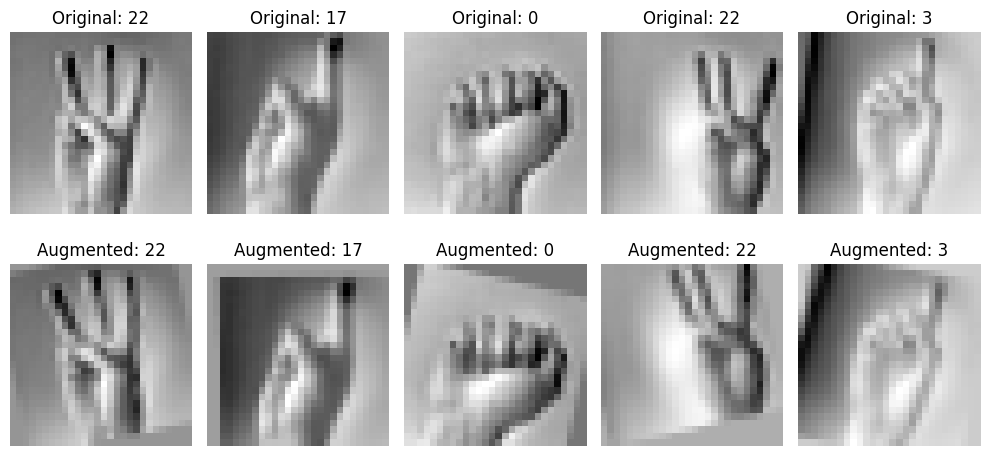

In [6]:
# print Examples of augmented images
import matplotlib.pyplot as plt
# change X_trian type to float64 before plot
# X_train_imgs = X_train_imgs.astype(np.float64)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(5):
    axes[0, i].imshow(X_train_imgs[i], cmap='gray')
    axes[0, i].set_title(f'Original: {y_train.iloc[i]}')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(aug_imgs[i], cmap='gray')
    axes[1, i].set_title(f'Augmented: {y_train.iloc[i]}')
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()
# ================================


In [7]:
# ================================

# 5. Train MLP

# ================================
# hidden_layer_sizes=(128, 64),
# “Training accuracy:” 0.9944
# “Validation accuracy:” 0.9971
# “Test accuracy:” 0.8989
  
model = MLPClassifier(
        
        hidden_layer_sizes=(64),
        activation='relu',
        solver='adam',
        alpha=0.001,
        learning_rate_init=0.0001,
        verbose=True,
        random_state=42,
        # n_iter_no_change=10,
        # tol = 0.0025,
        max_iter=250,
        # shuffle = False
        
    
    )
model.fit(X_train_aug, y_train_aug)

print("Model converged in", model.n_iter_, "epochs.")


Iteration 1, loss = 2.69515337
Iteration 2, loss = 1.95579302
Iteration 3, loss = 1.62600995
Iteration 4, loss = 1.42851093
Iteration 5, loss = 1.29529178
Iteration 6, loss = 1.19697849
Iteration 7, loss = 1.11947980
Iteration 8, loss = 1.05597511
Iteration 9, loss = 1.00278170
Iteration 10, loss = 0.95730080
Iteration 11, loss = 0.91784350
Iteration 12, loss = 0.88260852
Iteration 13, loss = 0.85120452
Iteration 14, loss = 0.82331764
Iteration 15, loss = 0.79769190
Iteration 16, loss = 0.77436771
Iteration 17, loss = 0.75314116
Iteration 18, loss = 0.73306364
Iteration 19, loss = 0.71495705
Iteration 20, loss = 0.69764795
Iteration 21, loss = 0.68198686
Iteration 22, loss = 0.66713928
Iteration 23, loss = 0.65283152
Iteration 24, loss = 0.64012147
Iteration 25, loss = 0.62754044
Iteration 26, loss = 0.61605008
Iteration 27, loss = 0.60418217
Iteration 28, loss = 0.59356460
Iteration 29, loss = 0.58332532
Iteration 30, loss = 0.57356467
Iteration 31, loss = 0.56451024
Iteration 32, los

c:\Users\30697\miniconda3\envs\compgeo2025\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


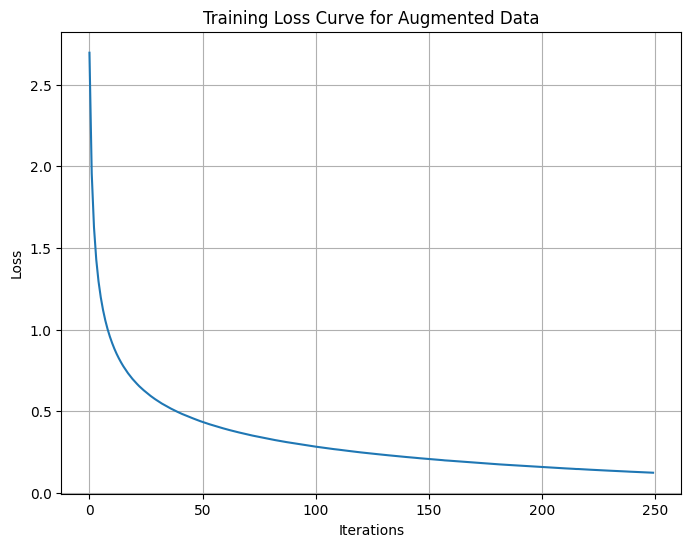

In [8]:
# Plot training loss curve for augmented model
plt.figure(figsize=(8,6))
plt.plot(model.loss_curve_)
plt.title("Training Loss Curve for Augmented Data")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [9]:
# ================================

# 6. Evaluation

# ================================
train_accuracy = model.score(X_train_aug, y_train_aug)* 100
print(f"Training Accuracy on Augmented Data: { train_accuracy:.4f}%")

val_accuracy = accuracy_score(y_validate, model.predict(X_validate))* 100
print(f"Validation Accuracy on Augmented Data: {val_accuracy:.4f}%")

test_accuracy = accuracy_score(y_test, model.predict(X_test))* 100
print(f"Test Accuracy on Augmented Data: {test_accuracy:.4f}%")


print("Report on Test Data:")
print(classification_report(y_test,model.predict(X_test)))

Training Accuracy on Augmented Data: 97.4390%
Validation Accuracy on Augmented Data: 100.0000%
Test Accuracy on Augmented Data: 84.8717%
Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       331
           1       1.00      0.90      0.95       432
           2       0.94      1.00      0.97       310
           3       0.65      0.89      0.75       245
           4       0.93      0.89      0.91       498
           5       0.91      1.00      0.95       247
           6       0.99      0.86      0.92       348
           7       1.00      0.98      0.99       436
           8       0.76      0.80      0.78       288
          10       0.93      0.80      0.86       331
          11       0.92      1.00      0.96       209
          12       0.71      0.83      0.77       394
          13       0.79      0.67      0.73       291
          14       1.00      0.89      0.94       246
          15       0.99      0.